# Introduction

In the following project, a dataset that contains all of the stats from the players in the NBA's last season.
The data set was obtained from Kaggle, and can be downloaded here: https://www.kaggle.com/acasalan/nba-player-stats-201718 

The main purpose of the project is to analyze every variable and determine if any of them have a significant correlation with a player's salary.
To achieve this, all of the proccesses seen in the Machine Learning Models class will be used.

# Hypothesis

After taking a quick look at the data, and taking into consideration what I know about player wages in sports, I predict that none of the variables will have a significant relation with the player's salary.

### Importing the data and describing it

In [36]:
import pandas as pd
nba = pd.read_csv('nbads.csv')
nba.head(2)

,#,Season Start,Player Name,Player Salary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24304,2017,A.J. Hammons,"1,312,611.00",C,24,DAL,22,0,163,...,0.45,8,28,36,4,1,13,10,21,48
1,24165,2017,Aaron Brooks,"2,116,955.00",PG,32,IND,65,0,894,...,0.80,18,51,69,125,25,9,66,93,322


In [37]:
nba.describe()

,#,Season Start,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,486.000000,486.0,486.000000,486.000000,486.000000,486.000000,486.000000,485.000000,485.000000,485.000000,...,471.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,24392.170782,2017.0,26.405350,53.783951,25.308642,1223.051440,13.020782,0.526944,0.314058,0.270179,...,0.741155,51.329218,168.962963,220.292181,114.522634,38.997942,24.041152,67.691358,100.720165,534.471193
std,171.748286,0.0,4.345194,24.835638,28.715875,842.438143,5.762420,0.089771,0.209748,0.180287,...,0.139453,57.476904,148.262162,198.675410,134.125263,32.692854,29.254771,62.423127,66.589277,487.642042
min,24096.000000,2017.0,19.000000,1.000000,0.000000,1.000000,-17.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24242.250000,2017.0,23.000000,35.250000,1.000000,449.500000,9.800000,0.502000,0.156000,0.165000,...,0.675000,11.000000,48.500000,64.750000,23.250000,13.000000,5.000000,20.000000,41.250000,143.000000
50%,24392.500000,2017.0,26.000000,62.500000,11.000000,1197.500000,12.800000,0.537000,0.324000,0.237000,...,0.766000,31.500000,142.000000,178.000000,72.000000,33.000000,15.000000,55.000000,102.500000,434.500000
75%,24541.750000,2017.0,29.000000,75.000000,49.750000,1942.250000,15.800000,0.576000,0.455000,0.339000,...,0.832000,68.750000,234.750000,305.750000,150.750000,56.750000,32.000000,98.000000,149.000000,772.750000
max,24690.000000,2017.0,40.000000,82.000000,82.000000,3048.000000,31.500000,0.799000,1.000000,2.000000,...,1.000000,345.000000,817.000000,1116.000000,906.000000,157.000000,214.000000,464.000000,278.000000,2558.000000


After doing this, we can get a rough idea of where the data from the data set is going. We can determine the average age of the players, ammount of games/minutes they played, etc.

### Setting the player salary as float, removing commas and converting na values to 0

In [38]:
nba['Player Salary'] = nba['Player Salary'].str.replace(',', '')
nba['Player Salary'].fillna(0, inplace=True)
nba['Player Salary'] = nba['Player Salary'].astype(float)
nba.head(1)

,#,Season Start,Player Name,Player Salary,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,24304,2017,A.J. Hammons,1312611.0,C,24,DAL,22,0,163,...,0.45,8,28,36,4,1,13,10,21,48


## Cleaning the data

Given that the data set includes, for example, 3-Pointers attempted | 3-Pointers Made | Percentage of 3P. I determined that the efficiency of every player would be more relevant given the objective of the project. Therefore, we remove the data that we won't use.

In [41]:
nbanum = nba[['Age','G','Player Salary', 'GS', 'MP', 'PER', 'ORB%', 'DRB%', 'TRB%','AST%','STL%','BLK%']]
nbanum.head(1)

,Age,G,Player Salary,GS,MP,PER,ORB%,DRB%,TRB%,AST%,STL%,BLK%
0,24,22,1312611.0,0,163,8.4,5.4,20.9,12.8,3.8,0.3,7.2


### Histograms

Histograms will help us determine the frequency of a variable. It will serve as a basic tool to understand the dataset and how it is distributed.

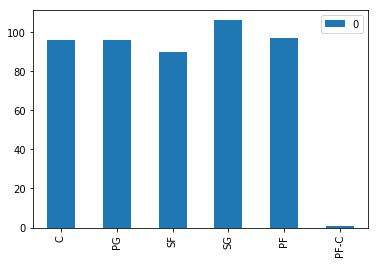

In [39]:
import seaborn as sns
from collections import Counter

Position = nba.Pos
posscounter = Counter(Position)
count = pd.DataFrame.from_dict(posscounter, orient='index')
count.plot(kind='bar')

#A counter to determine the ammount of players per position

C:\Anaconda\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


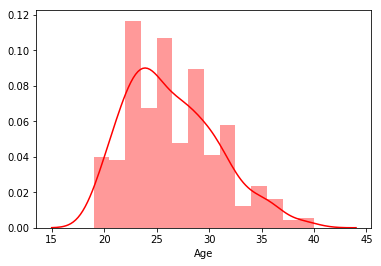

In [17]:
sns.distplot( nba["Age"] , color="red", label="Age")

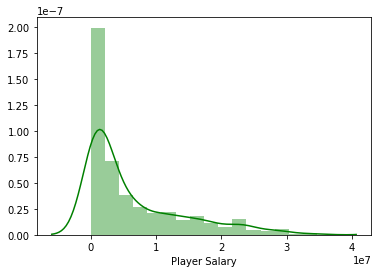

In [33]:
sns.distplot( nba["Player Salary"] , color="green", label="Salary")

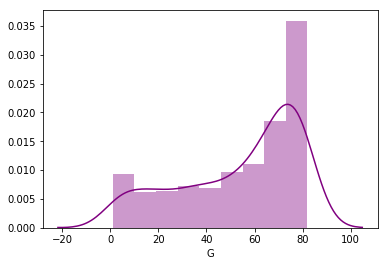

In [19]:
sns.distplot( nba["G"] , color="purple", label="Games")

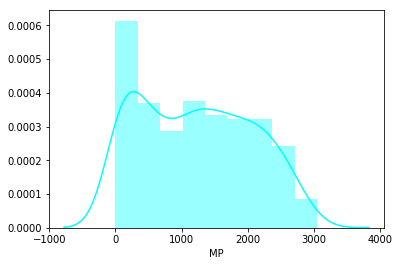

In [22]:
sns.distplot( nba["MP"] , color="cyan", label="Minutes Played")

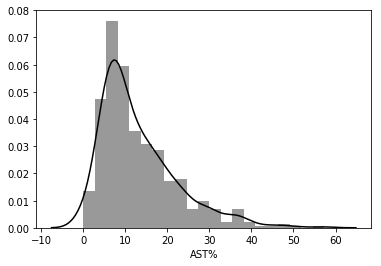

In [23]:
sns.distplot( nba["AST%"] , color="black", label="Assist percentage")

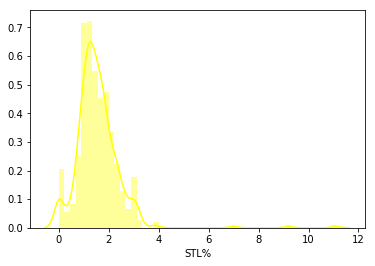

In [24]:
sns.distplot( nba["STL%"] , color="yellow", label="Steal Percentage")

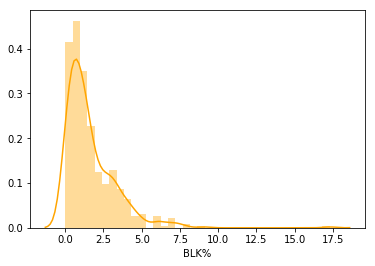

In [25]:
sns.distplot( nba["BLK%"] , color="orange", label="Block Percentage")

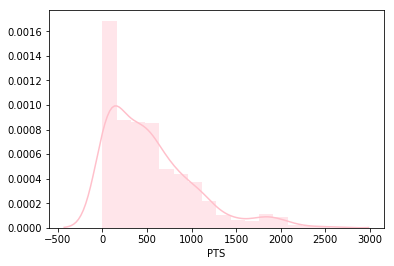

In [26]:
sns.distplot( nba["PTS"] , color="pink", label="Points")

### HeatMap

Now that we have the Histograms, we make a HeatMap to determine what variables are correlated to each other

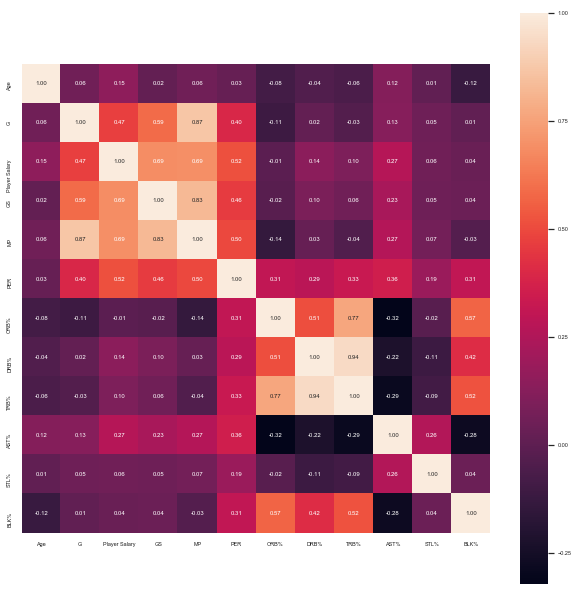

In [44]:
sns.set_style("whitegrid")
sns.set_context("paper")
sns.set(rc={"figure.figsize":(10.5,10.5)})

cols = list(nbanum)
cm = np.corrcoef(nbanum.values.T)
sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", yticklabels=cols, xticklabels=cols)

Taking a look at the HeatMap, we can observe that not many variables hold a strong correlation to any of the other variables.
As for player salary, there's some that turn out to be a little significant, Minutes Played is one of the stronger links. 

## ScatterPlots and Predictions

After understanding what are the most relevant variables, we can examine them closer relating them to Player Salary and performing a prediction to display in numbers their relevance.

A ScatterPlot will show how variables are distributed between two variables.

The X axis will be taken by Player Salary, while the Y axis will be taken by the cvariable we're using to compare.

In this case, I'll show the two more significant results:
    - Age-Salary since it has the stronger relation
    - Minutes Played - Salary given that the heat map showed it as one of the stronger links

##### Age-Salary

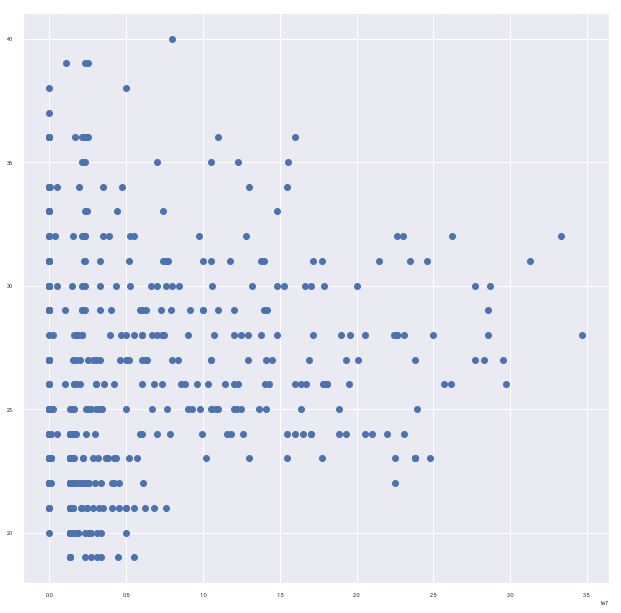

In [45]:
x = nba["Player Salary"].values.reshape(-1,1)
y = nba["Age"].values.reshape(-1,1)

plt.scatter(x, y)
plt.show()

In [46]:
mod = sm.OLS(y, x).fit()
predictions = mod.predict(x)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     361.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):           1.26e-60
Time:                        20:53:58   Log-Likelihood:                -2151.7
No. Observations:                 486   AIC:                             4305.
Df Residuals:                     485   BIC:                             4310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.769e-06   9.31e-08     19.010      0.000    1.59e-06    1.95e-06
==============================================================================
Omnibus:                       83.643   Durbin-Watson:                   0.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.889
Skew:                          -1.145   Prob(JB):                     7.60e-28
Kurtosis:                       3.962   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the ScatterPlot, we can see that younger players are not getting paid as much as older players, but as a player gets older, his Salary starts dropping once again.
Leaving our better paid players in the range of mid twenties to early thirties.

###### Minutes Played-Salary

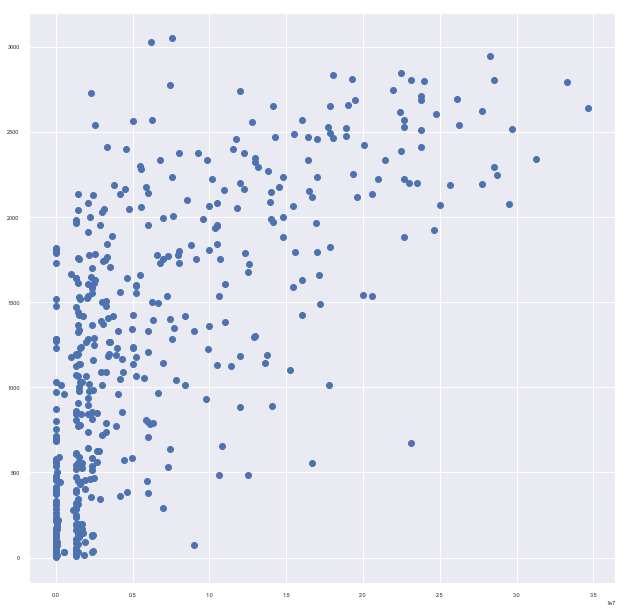

In [47]:
a = nba["Player Salary"].values.reshape(-1,1)
b = nba["MP"].values.reshape(-1,1)

plt.scatter(a, b)
plt.show()

In [48]:
mod = sm.OLS(b, a).fit()
predictions = mod.predict(x)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     1075.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          4.07e-125
Time:                        20:56:07   Log-Likelihood:                -3955.0
No. Observations:                 486   AIC:                             7912.
Df Residuals:                     485   BIC:                             7916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001    3.8e-06     32.785      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.660   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                5.367
Skew:                          -0.106   Prob(JB):                       0.0683
Kurtosis:                       3.469   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, we can observe that there's a lot players not playing that much and getting good Salaries, just as there are players who play plenty of minutes and have lower Salaries.

This is due to injuries, for example, Kyrie Irving is a player with a high Salary, but he was injured most of the season so his Minutes Played drop down

With that in mind, we can determine that Minutes Played will not have any impact in how much a Player earns, and for that reason from now on the paper will be focused on the relation between Salary and Age since the ScatterPlot displays a strong relation between them

# Expectation-maximization clustering 

This is an algorithm that will help us determine the maximum likelihood or maximum a posteriori, which is defined as an estimate of an unknown quantity, that equals the mode of the posterior distribution.

In [49]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs), )

In [50]:
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, vmin=0, vmax=.2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2).set_ylim(top=.2, bottom = 0, vmin=0, vmax=.2)
        
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [51]:
nbafeatures = nbanum.loc[:, 'Age':]
nbalabel = nbanum[['Player Salary']]

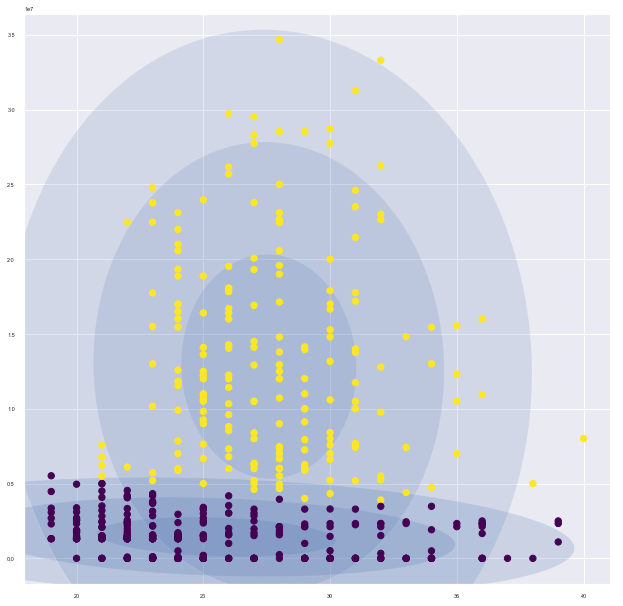

In [53]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(nbafeatures[['Age', 'Player Salary']])

plot_gmm(gmm, np.array(nbafeatures[['Age', 'Player Salary']]))

Analyzing the result that the Algorithm gives, we can determine that the Likelihood is not very strong between the Age and the Player Salary, this means that the density of the points is not high, which in itself means that there's not much of a relation between the variables

# PCA

PCA will allow us to summarize and visualize the information in a data set containing observations described by multiple inter-correlated variables.
The variables must be quantitive.

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
nbafeatures = nbanum.iloc[:, 1:]
nbalabels = nbanum.iloc[:,0]

sc = StandardScaler()
nbafeatures_std = sc.fit_transform(nbafeatures)

nbafeatures_std = pd.DataFrame(nbafeatures_std)
nbafeatures_std.columns = nbafeatures_std.columns
nbafeatures_std.head()

nbafeatures.head()
# Define number of principal components
pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(nbafeatures_std)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = nbalabels
pc_df.head()

C:\Anaconda\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,PC1,PC2,PC3,Cluster
0,-1.778725,2.763709,-0.628381,24
1,-1.206861,-1.752590,0.161726,32
2,1.674545,-0.572797,-0.919715,21
3,-3.313107,-0.466958,-0.895311,22
4,-1.333446,2.318037,1.908466,25


In [63]:
pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(nbafeatures)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = nbalabels
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-5.046342e+06,672.436041,-4.708217,24
1,-4.241998e+06,2.512080,21.142841,32
2,-8.545331e+05,-1141.808877,-23.291590,21
3,-6.358953e+06,717.786844,-14.888359,22
4,-6.358953e+06,599.490179,-8.433706,25


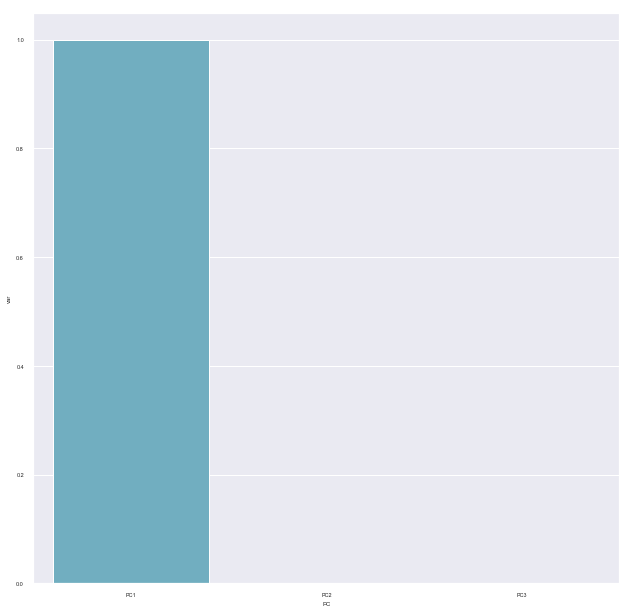

In [64]:
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")

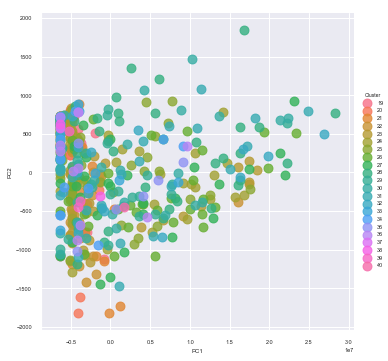

In [65]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [66]:
# Define number of principal components
pca = PCA(n_components=3)

# Fit to features
pc = pca.fit_transform(nbafeatures_std)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, 
        columns = ['PC1', 'PC2','PC3'])
pc_df['Cluster'] = nbalabels
pc_df.head()

,PC1,PC2,PC3,Cluster
0,-1.778725,2.763709,-0.628381,24
1,-1.206861,-1.752590,0.161726,32
2,1.674545,-0.572797,-0.919715,21
3,-3.313107,-0.466958,-0.895311,22
4,-1.333446,2.318037,1.908466,25


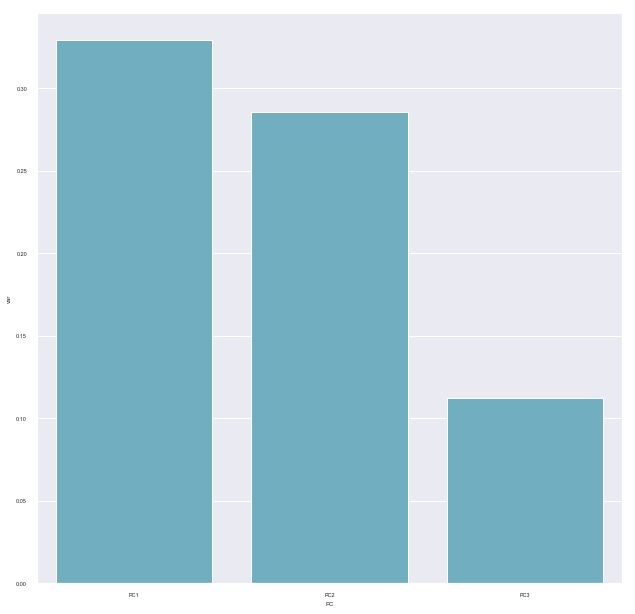

In [67]:
# Scree plot
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")

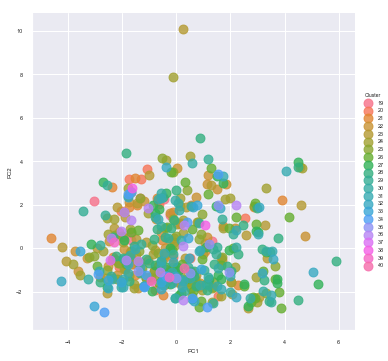

In [68]:
# Scatter plot of the first and second principal components (PC1, PC2) clustered by wine label
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

C:\Anaconda\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'PCA Plot of first PCs')

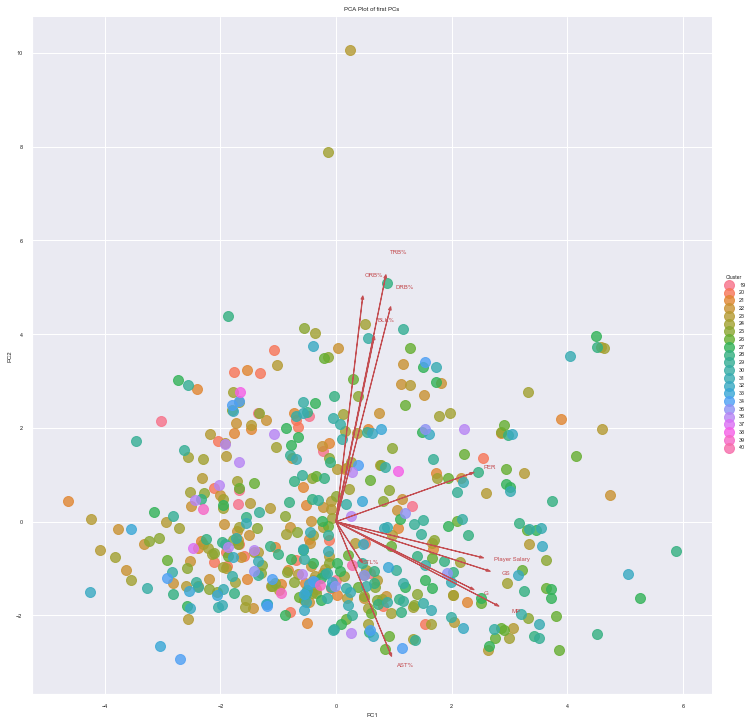

In [69]:
# PCA biplot
# Scatter plot based and assigned color based on 'label - y'
sns.lmplot('PC1', 'PC2', data=pc_df, fit_reg = False, size=10, hue = 'Cluster', scatter_kws={"s": 100})
 
# set the maximum variance of the first two PCs
# this will be the end point of the arrow of each **original features**
xvector = pca.components_[0]
yvector = pca.components_[1]
 
# value of the first two PCs, set the x, y axis boundary
xs = pca.transform(nbafeatures_std)[:,0]
ys = pca.transform(nbafeatures_std)[:,1]
 
## visualize projections
 
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.05)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             list(nbafeatures.columns.values)[i], color='r')
 
plt.title('PCA Plot of first PCs')

With the results obtained from the Algorithm, we can observe that the data is scattered all over the place, and the arrows, which represent our descriptive variables, are not leading the data anywhere.
In other words, none of the descriptive variables have much correlation with the direction the data is taking.

# Conclusion

None of the Variables have a strong link to the Salary of a given player.

The only variable that has a bit of a trend when attempting to predict a Salary is Age. 
This could be due to Rookie contracts, given that when players start joining the NBA, they will spend the next two or three years in a Rookie Contract, which does not pay as much as a Regular contract.

When a player gets older, he gets close to retirement which would explain why older players such as Dirk Nowitsky or Vince Carter are not getting paid as much, even when they had amazing careers.

Lastly, this is not a 100% related given that there's a lot of players who join the NBA at an older age coming from the Euro League or any other place from the world. That kind of player will not get paid as much as a player who has developed his entire career in the NBA.

As for the rest of the variables, they have low correlation since they agree on a contract, which incluse wage, before the season starts. 
For example, LeBron James could agree to a $40Mill contract, and then go and have his worst season so far. This would explain why there's good players getting low Salaries, and bad players getting High Salaries.

Injuries play a big role too.